## Meru Prastarah

Mount Meru is a mystical mountain at the center of the universe. It is interesting to 
research *Meru Prastarah* but for our purposes we will take it to be a triangular arrangement 
of numbers (also sometimes called the Pascal Triangle) built from a couple of simple rules.

There is a story that goes with this Notebook, written below. But first we need a working template
which is drawn by the next cell. If you run the next cell as-is you will get the template which
you can print and write on. If you look for the part of the code that contains the Control Switches
you can turn other parts of the diagram on to see what they should look like. However this is not
necessary; you should be able to simply follow the story line to build the diagram as intended.

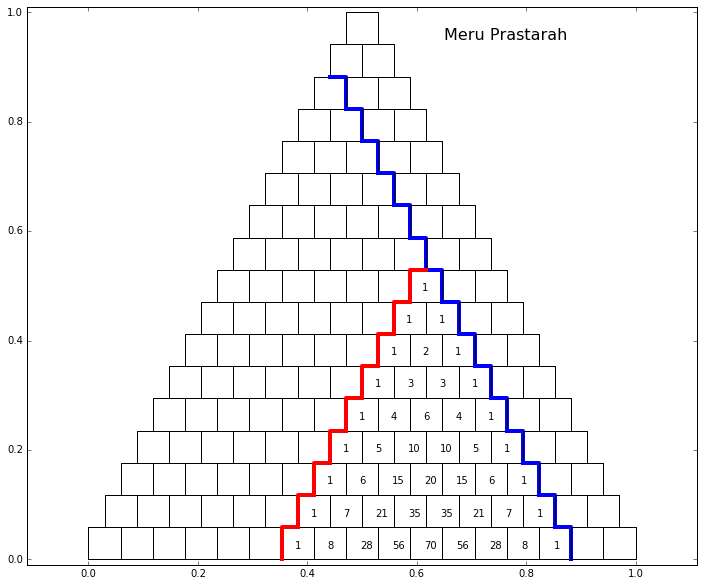

In [2]:
##################
## change this value to see more or less of the triangle
##   (but you must also relocate the '1')
##
pascal_size = 17
##
##################

# This program draws the Pascal triangle as empty boxes
# Use the pascal_size value to control the fineness of your results

do_draw_odd_dots = False
do_draw_boxes = True
do_labels = False
do_apex_1 = True
do_ul_lr_long_diagonal = True
do_ur_ll_short_diagonal = True
do_meru_prastarah = True
if pascal_size >= 100: do_draw_boxes = False
    
# make plots inline (so that they do not pop-out)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')

lower_limit = -0.01
upper_limit = 1.01
ax.set(xlim=(lower_limit, upper_limit), ylim=(lower_limit,upper_limit))
if do_labels:
    ax.set(xlabel='x axis', ylabel = 'y axis', title='bulc htam rehto')

eorowPrev = []
eorowThis = []
xc = []        # xc[] and yc[] will be center coordinates of odd-location dots
yc = []

dx = 1.0/pascal_size
dy = 1.0/pascal_size

halfdx = dx / 2.0
halfdy = dy / 2.0

for row in range(int(pascal_size)):
    this_row = row + 1
    if do_draw_boxes:
        for column in range(this_row):
            x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
            y = 1.0 - dy*float(this_row)
            ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
            if do_ul_lr_long_diagonal and this_row >= 3 and column == this_row - 3:
                ax.plot([x+dx/2., x+dx, x+dx], [y + dy, y + dy, y], color='b', linewidth=4)
            if do_ur_ll_short_diagonal and this_row >= 9 and column == 6:
                ax.plot([x,x,x+dx/2],[y,y+dy,y+dy], color='r', linewidth=4)

    # Accumulate a list of odd cells...
    #   Let's take care of the even/odd values in eorowThis[]
    if do_draw_odd_dots:
        eorowThis = [1]    # First element is always "odd"
        if this_row == 2:        # This clause of the if could be combined with the next
            eorowThis.append(1)
        elif this_row > 2:
            # In the following loop we are traversing the row...
            #   suppose this_row == 3 (1 2 1) then n will go 0
            #   suppose this_row == 4 (1 3 3 1) then n will go 0 1
            for n in range(this_row-2):
                if eorowPrev[n] != eorowPrev[n+1]:
                    eorowThis.append(1)
                else:
                    eorowThis.append(0)
            eorowThis.append(1)
        for n in range(this_row):
            if eorowThis[n] == 1: 
                xc.append(0.5 - float(this_row)*0.5*dx + float(n)*dx + halfdx)
                yc.append(1.0 - dy*float(this_row) + halfdy)
        eorowPrev = list(eorowThis)

from scipy.misc import comb

xmp0 = 0.61
ymp0 = 0.492
xmpDx0 = 0.029
xmpDx1 = 0.059
ymp0 = 0.492
ympDy = 0.059

def xmp(a,b): return xmp0 - float(b)*xmpDx0 + float(a)*xmpDx1
def ymp(a,b): return ymp0 - float(b)*ympDy

# You must move this if you change the number of rows from 17
if do_apex_1:
    plt.text(xmp(0,0), ymp(0,0), "1")
    
do_all_ones = True
if do_all_ones:
    for j in range(1,9):
        for i in [0,j]:
            plt.text(xmp(i,j), ymp(i,j), "1")

do_interior_of_mp = True
if do_interior_of_mp:
    for j in range(2, 9):
        for i in range(1,j):
            plt.text(xmp(i,j), ymp(i,j), int(comb(j,i)))
    
if do_meru_prastarah:
    plt.text(0.65, 0.95, "Meru Prastarah", fontsize='16')
    
do_magenta_strikes = False
# These don't quite work yet
if do_magenta_strikes:
    for j in range(9):
        x0 = xmp(0,j)
        y0 = ymp(0,j)
        x1 = xmp(j+1,j-1)
        y1 = ymp(j+1,j-1)
        ax.plot([x0, x1], [y0, y1], color='magenta', linewidth=1)
        
           
if do_draw_odd_dots:
    pssquared = float(pascal_size*pascal_size)
    dotsize = (80.*80.*30.)/pssquared
    ax.scatter(xc, yc, s=dotsize, marker='.', color='b')

plt.show()

Normally we begin the triangle at the very top; but in this case we begin where
the number 1 is written. 

Proceed to make additional 1s down both the red and blue diagonals: Write below them. 

In [12]:
# You must move this if you change the number of rows from 17
